In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Método congruencial para generar números aleatorios

In [25]:
m = 999
a = 9
c = 5
x_i = 0
x_0 = 11
for i in range(10):
    if i == 0:
        x_i = x_0
    x_i = (a * x_i + c) % m
    R = x_i / (m - 1)
    print(f'x_{i + 1}', x_i, R)

x_1 104 0.10420841683366733
x_2 941 0.9428857715430862
x_3 482 0.48296593186372744
x_4 347 0.34769539078156314
x_5 131 0.1312625250501002
x_6 185 0.18537074148296592
x_7 671 0.6723446893787575
x_8 50 0.050100200400801605
x_9 455 0.4559118236472946
x_10 104 0.10420841683366733


### MersenneTwister

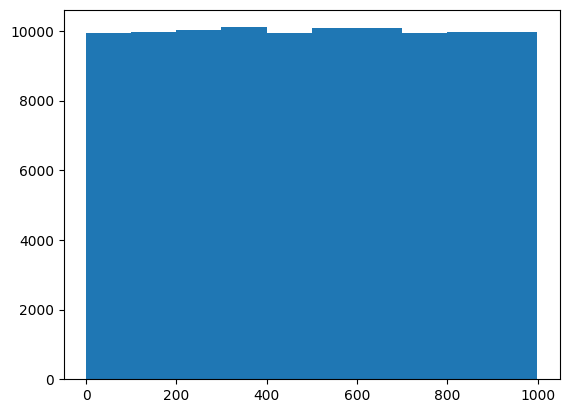

In [26]:
class MersenneTwister:
    def __init__(self, seed=5489):
        self.n = 624  # Tamaño del estado
        self.state = [0] * self.n
        self.index = self.n  # Índice inicial
        self.seed(seed)

    def seed(self, seed):
        """Inicializa la matriz de estado"""
        self.state[0] = seed
        for i in range(1, self.n):
            self.state[i] = (1812433253 * (self.state[i-1] ^ (self.state[i-1] >> 30)) + i) & 0xFFFFFFFF

    def twist(self):
        """Realiza la transformación de mezcla"""
        for i in range(self.n):
            y = (self.state[i] & 0x80000000) + (self.state[(i+1) % self.n] & 0x7FFFFFFF)
            self.state[i] = self.state[(i + 397) % self.n] ^ (y >> 1)
            if y % 2 != 0:  # Aplicar la máscara si el bit menos significativo es 1
                self.state[i] ^= 0x9908B0DF
        self.index = 0

    def extract_number(self):
        """Extrae un número aleatorio"""
        if self.index >= self.n:
            self.twist()

        y = self.state[self.index]
        self.index += 1

        # Aplicar las transformaciones no lineales
        y ^= (y >> 11)
        y ^= (y << 7) & 0x9D2C5680
        y ^= (y << 15) & 0xEFC60000
        y ^= (y >> 18)

        return y & 0xFFFFFFFF  # Retornar solo 32 bits

# Uso del generador
mt = MersenneTwister(seed=42)

nums = []
# Generar 5 números aleatorios
for _ in range(100000):
    x = mt.extract_number() / 0xFFFFFFFF
    nums.append(int(x * 1000))

textfile = open('Uniform_distribution.txt','w')
for x_i in nums: 
    textfile.write("%s\n" % x_i)

nums.sort()
nums = np.array(nums)

plt.hist(nums)
plt.show()

In [27]:
a = 0 #limite inferior
b = 999 #límite superior

### Media

$$\mu = \frac{a + b}{2}$$

In [28]:
def mean(list_nums):
    n = len(list_nums)
    return round(sum(list_nums) / n, 3)

In [29]:
print(f'Media: {mean(nums)}')

Media: 499.193


In [30]:
print(f'Media: {(0 + 999) / 2}')

Media: 499.5


### Varianza

$$\sigma ^ 2 = \frac{(b - a) ^ 2}{12}$$

In [31]:
def k_central_moment(list_nums, k):
    n = len(list_nums)
    mean_ = mean(list_nums)
    return round(sum((list_nums - mean_) ** k) / n, 3)

In [32]:
print(f'Varianza: {k_central_moment(nums, 2)}')

Varianza: 83086.103


In [33]:
print(f'Varianza: {(b - a) ** 2 / 12}')

Varianza: 83166.75


### Curstosis

$$ \beta _{2} = \frac{\mu _{4}}{\sigma ^4} $$

*  leptocúrtica: $\beta _{2} > 3$; distribución con colar más largas que la normal.
*  platicúrtica: $\beta _{2} < 3$; distribución con colas menos largas que la normal.
*  mesocúrtica: $\beta _{2} = 3$; cuando tiene una distribución normal (o su misma curtosis).

In [34]:
def curtosis(list_nums):
    return k_central_moment(list_nums, 4) / (k_central_moment(list_nums, 2) ** 2)

In [35]:
print(f'Curtosis: {curtosis(nums)}')

Curtosis: 1.8036490417313158


https://www.academia.utp.ac.pa/sites/default/files/docente/541/l3_generacion_de_numeros_aleatorios_.pdf